In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
NUM_CATEGORIES = 43  
IMG_WIDTH = 30  
IMG_HEIGHT = 30

In [3]:
current_dir = os.getcwd() + "\\gtsrb"


This directory contains 43 different folders labeled 0 to 42. These labels depict the various different categories for the images. In each labeled folder is a number of images for that particular label

In [4]:
# Get the images from the directory
images = []
labels = []

for i in range(0, NUM_CATEGORIES):
    path = os.path.join(current_dir, str(i))
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
        images.append(img_array)
        labels.append(i)



## Plotting 8 images from each category for visualization

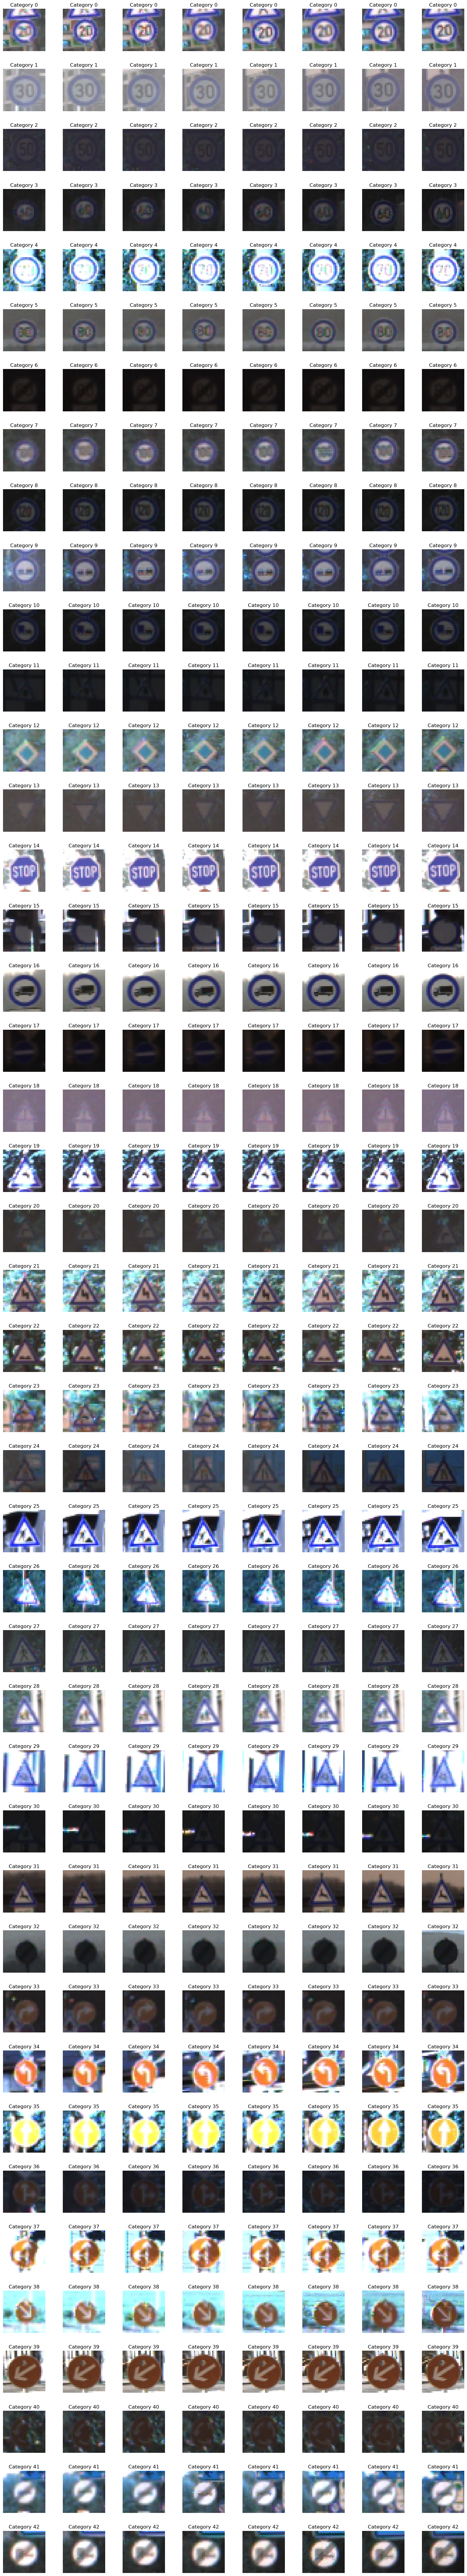

In [5]:
category_images = {i: [] for i in range(NUM_CATEGORIES)}

# Populate the dictionary with images categorized by their label
for img, label in zip(images, labels):
    category_images[label].append(img)

# Determine the number of subplots needed
num_plots = NUM_CATEGORIES * 8
rows = NUM_CATEGORIES
cols = 8

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
fig.tight_layout(pad=0.5)

for i in range(NUM_CATEGORIES):
    for j in range(8):
        ax = axes[i, j] if 8 > 1 else axes[i]
        if j < len(category_images[i]):
            # Display the image
            ax.imshow(category_images[i][j])
            # Display the label above the image
            ax.set_title(f"Category {i}")
        ax.set_axis_off()

# Show the plot
plt.show()

## Some house keeping codes
* This first converts the int labels to one-hot encoded. 
* Converting the images to numpy arrays and normalizing them. 
* Splitting the data into training and testing data

In [6]:
labels = tf.keras.utils.to_categorical(labels, num_classes=NUM_CATEGORIES)
images = np.array(images) / 255
x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.4)


## Building a CNN model

In [7]:
model = Sequential([
    Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),    
    
    # First convolutional layer with 32 filters
    Conv2D(32, (3, 3), activation="relu"),
    
    # Second convolutional layer with 32 filters
    Conv2D(32, (3, 3), activation="relu"),
    
    # Max pooling layer with 2x2 pool size
    MaxPooling2D(pool_size=(2, 2)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten units
    Flatten(),
    
    # Fully connected layer with 128 units and dropout
    Dense(128, activation="relu"),
    Dropout(0.5),
    
    # Output layer with softmax activation for classification
    Dense(NUM_CATEGORIES, activation='softmax')
])

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## Training the model

In [9]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0696 - loss: 5.5212
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3152 - loss: 2.4965
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5341 - loss: 1.4810
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6610 - loss: 1.0301
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7404 - loss: 0.7917
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8135 - loss: 0.5883
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8480 - loss: 0.4612
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8768 - loss: 0.4050
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8702 - loss: 0.4238
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9040 - loss: 0.3243


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss = {test_loss},\n Test accuracy = {test_acc}')

333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9716 - loss: 0.1064
Test loss = 0.10861997306346893,
 Test accuracy = 0.969782292842865
